# Movie recommendation

# Dataset-
the data set used here is very famous movielens 1m dataset


In [4]:
#importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
base_path = '..' #/Users/akshatpandey/Thesisproject/Movie recommendation/data/ratings.csv

In [6]:


# Reading ratings file
# Ignore the timestamp column
#sep and encoding is used because csv file is not in correct format


ratings = pd.read_csv(base_path+'//data//ratings.csv',sep='\t', encoding='latin-1',usecols=['user_id', 'movie_id', 'rating'])

# Reading users file
users = pd.read_csv(base_path+'//data//users.csv',sep='\t' ,encoding='latin-1',usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv(base_path+'//data//movies.csv',sep='\t',encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [7]:
max_userid = ratings['user_id'].drop_duplicates().nunique()
max_movieid = ratings['movie_id'].drop_duplicates().nunique()


In [8]:
#unique user and movie ids
print (max_userid)
print(max_movieid)

6040
3706


In [9]:
ratings.head(5)

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [10]:
users.head(5)

,user_id,gender,zipcode,age_desc,occ_desc
0,1,F,48067,Under 18,K-12 student
1,2,M,70072,56+,self-employed
2,3,M,55117,25-34,scientist
3,4,M,02460,45-49,executive/managerial
4,5,M,55455,25-34,writer


In [11]:
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   6040 non-null   int64 
 1   gender    6040 non-null   object
 2   zipcode   6040 non-null   object
 3   age_desc  6040 non-null   object
 4   occ_desc  6040 non-null   object
dtypes: int64(1), object(4)
memory usage: 236.1+ KB


In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


# WordCloud

In [15]:
!pip install wordcloud

In [16]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

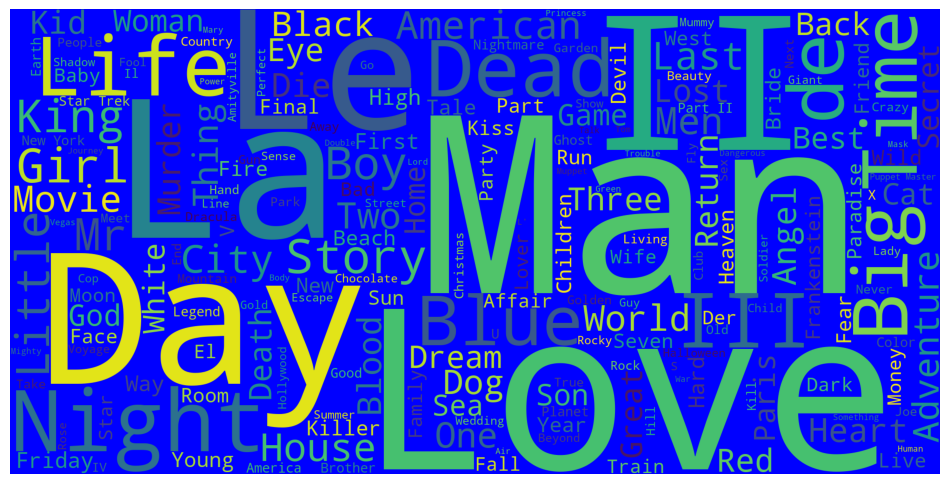

In [17]:
# Create a wordcloud of the movie titles
#movies['title'] = movies['title'].fillna("").astype('str')
movies["title"] = movies["title"]
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='blue', height=1000, width=2000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(12,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [22]:
ratings["rating"].mean()

3.581564453029317

In [23]:
ratings["rating"].value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: rating, dtype: int64

In [26]:
ratings["rating"].median()

4.0

### mean rating is 3.5 and most of the users have rated movies as 3-4-5 meaning scale out of 5 was not a good indicator

/var/folders/s9/lx51b0qx47q0yds7m54ktf2w0000gn/T/ipykernel_32207/2134419950.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))


<Axes: xlabel='rating', ylabel='Density'>

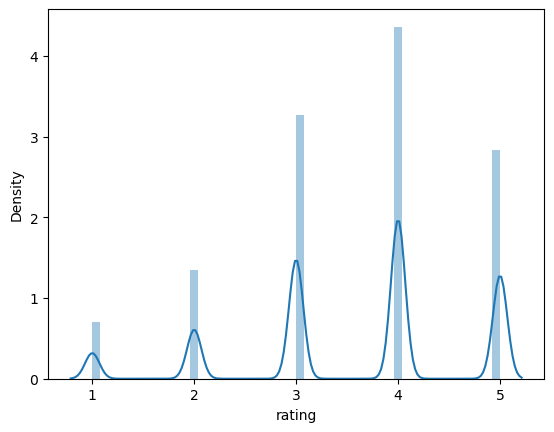

In [20]:
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

In [27]:
#Lets find out top 5 genre
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [28]:
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [31]:
genre_labels #18 different grenres are present

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [62]:
def count_word(dataset,column,labels):
    keyword_count = dict()
    for s in labels:
        keyword_count[s]=0
    for a in dataset[column].str.split("|"):
        for p in a:
            keyword_count[p]+=1
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
        keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    
    return keyword_occurences
            

In [63]:
keyword_occurences= count_word(movies, 'genres', genre_labels)

In [65]:
keyword_occurences # Drama and comedy are very liked genre

[['Drama', 1603],
 ['Comedy', 1200],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471],
 ['Horror', 343],
 ['Adventure', 283],
 ['Sci-Fi', 276],
 ["Children's", 251],
 ['Crime', 211],
 ['War', 143],
 ['Documentary', 127],
 ['Musical', 114],
 ['Mystery', 106],
 ['Animation', 105],
 ['Fantasy', 68],
 ['Western', 68],
 ['Film-Noir', 44]]

In [68]:
genres1=dict(keyword_occurences)

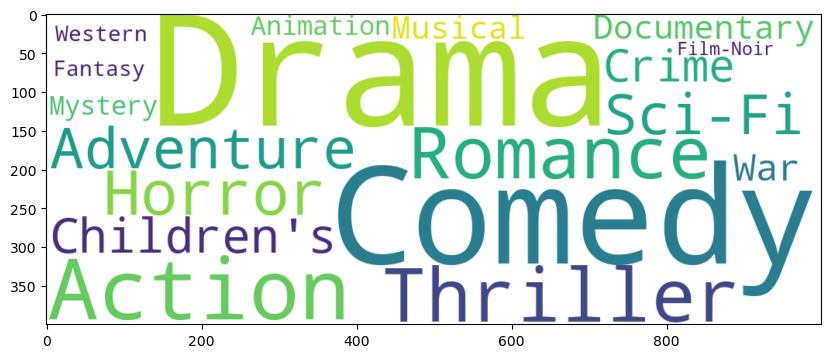

In [73]:
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres1)
plt.figure(figsize=(10,5))
plt.imshow(genre_wordcloud, interpolation="bilinear")